# Imports

In [5085]:
import numpy as np
import matplotlib.pyplot as plt
import math
import random

# Desarrollo

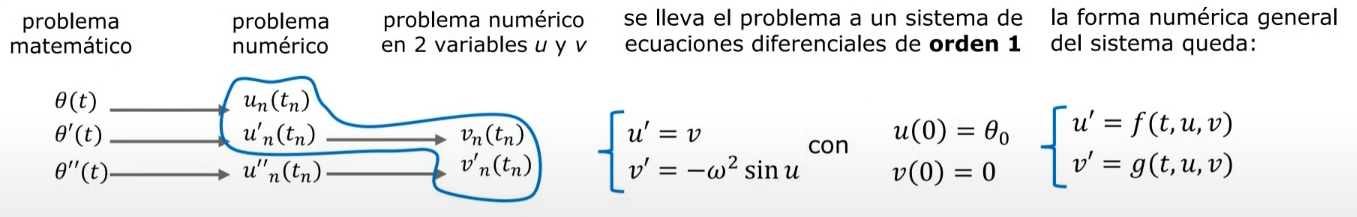

## Valores de aceleracion y radio de la trayectoria en la curva

In [5086]:
aceleracion_en_curva = 9.8*6
radio = 5
t_relativo = 0
barrida_limite = 0
barrida_inicial = 0

## Funcion difetencial f de la curva

In [5087]:
def f_curva (timepo, angulo, velocidad_angular):
    return -(aceleracion_en_curva * np.sin(((angulo - barrida_inicial)/barrida_limite)*math.pi*2) / radio*velocidad_angular) * np.sin(angulo)

## Valores de la trayectoria recta

In [5088]:
m = 800
aceleracion_recta = 5

## Funcion diferencial f de la la trayectoria recta

In [5089]:
dist_limite = 0
G = 9.81
def f_recta(tiempo, posicion, velocidad):
  return ((2400*G)/800)*(1 - posicion/dist_limite)

## Trayectoria

### Tools de funciones

In [5090]:
def pasar_a_radianes(angulo):
    return math.pi/180 * angulo 

print(pasar_a_radianes(180))

3.141592653589793


In [5091]:
#El angulo que recibe no esta representado en radianes
def obtener_radio_de_una_curva(longitud, angulo):
    return longitud/pasar_a_radianes(angulo)

print(obtener_radio_de_una_curva(19, 108))

10.079813062486705


In [5092]:
#El angulo que recibe no debe de estar representado en radianes
def punto_final_de_una_recta(punto_inicial, longitud, angulo):
    angulo_rad = pasar_a_radianes(angulo)
    x = math.cos(angulo_rad) * longitud
    y = math.sin(angulo_rad) * longitud
    x0 = punto_inicial[0]
    y0 = punto_inicial[1]
    return np.array([ x + x0 , y + y0 ])

print(punto_final_de_una_recta(np.array([0, 0]), 1, 45))

[0.70710678 0.70710678]


In [5093]:
print(punto_final_de_una_recta(np.array([0, 0]), 164.16, 16))

[157.80072001  45.24862833]


In [5094]:
#El angulo que recibe no debe de estar representado en radianes
def punto_final_de_una_curva(punto_inicial, longitud, angulo_de_barrido, angulo_inicial):
    radio = obtener_radio_de_una_curva(longitud, angulo_de_barrido)
    angulo_barrido_rad = pasar_a_radianes(angulo_de_barrido)
    angulo_inicial_rad = pasar_a_radianes(angulo_inicial)
    x = (math.cos(angulo_inicial_rad + angulo_barrido_rad)) * radio
    y = (math.sin(angulo_inicial_rad + angulo_barrido_rad)) * radio
    
    x0 = punto_inicial[0]
    y0 = punto_inicial[1]
    return np.array([ x + x0 , y + y0 ])

print(punto_final_de_una_curva(np.array([157.8, 45.2]), 40, 123.1, 16-90))

[169.98972715  59.27220592]


In [5095]:
def esta_dentro_del_limite(punto1, punto2, punto_a_evaluar, operacion):
    x1, y1 = punto1
    x2, y2 = punto2

    # Calcular la pendiente
    m = (y2 - y1) / (x2 - x1)

    # Calcular el término independiente
    b = y1 - m * x1

    if operacion == "<=":
        return punto_a_evaluar[1] <= m * punto_a_evaluar[0] + b
    elif operacion == ">=" :
        return punto_a_evaluar[1] >= m * punto_a_evaluar[0] + b

In [5096]:
print(esta_dentro_del_limite([1, 0], [0, 1], [1, 1], "<="))

False


In [5097]:
#la recta estara limitada entre el punto1 y punto2
#se usara para elegir el punto inicial 
def punto_aleatorio_en_un_segmento(punto1, punto2):

    p1 = np.array(punto1)
    p2 = np.array(punto2)

    #vector director de la recta
    vector_director = p2 - p1

    # Generar un valor aleatorio entre 0 y 1 para determinar la posición del punto
    t = np.random.rand()

    #calcular el punto aleatorio en el segmento
    punto_aleatorio = p1 + t * vector_director

    return np.array(punto_aleatorio)

In [5098]:
def calcular_velocidad_angular(v_x, v_y, r):
    v_t = math.sqrt(v_x**2 + v_y**2)
    omega = v_t / r
    return omega

In [5099]:
def calcular_velocidad_angular(v_x, v_y, r):
    v_t = math.sqrt(v_x**2 + v_y**2)
    omega = v_t / r
    return omega

In [5100]:
RADIO_INTERNO_PRIMERA_CURVA = obtener_radio_de_una_curva(19.20, 108)
RADIO_EXTERNO_PRIMERA_CURVA = obtener_radio_de_una_curva(40.80, 123.1)
RADIO_INTERNO_SEGUNDA_CURVA = obtener_radio_de_una_curva(36.90, 76.2+90)
RADIO_EXTERNO_SEGUNDA_CURVA = obtener_radio_de_una_curva(49.80, 65+90)

### Implementacion del diseño de trayectorias

In [5101]:
def condicion_de_corte_limite(limite, operacion, y):
    if operacion == "<":
        return y < limite
    elif operacion== ">":
        return y > limite

In [5102]:
def range_kutta_de_orden_4(f, t0, y0, u0, h, limite):
    t = t0
    y = y0
    u = u0
    resultados = [(t, y, u)]
    while limite > y:
        m1 = u
        k1 = f(t, y, u)

        m2 = u + (h / 2) * k1
        k2 = f(t + (h / 2), y + m1 * (h / 2), u + (h / 2) * k1)

        m3 = u + (h / 2) * k2
        k3 = f(t + (h / 2), y + m2 * (h / 2), u + (h / 2) * k2)

        m4 = u + h * k3
        k4 = f(t + h, y + m3 * h, u + h * k3)

        y += (h / 6) * (m1 + 2 * m2 + 2 * m3 + m4)
        u += (h / 6) * (k1 + 2 * k2 + 2 * k3 + k4)
        t += h
        resultados.append((t, y, u))
    return resultados
    

In [5103]:
def range_kutta_de_orden_4_aux(f, t0, y0, u0, h, n):
    t = t0
    y = y0
    u = u0
    resultados = [(t, y, u)]
    for i in range(n-1):
        m1 = u
        k1 = f(t, y, u)

        m2 = u + (h / 2) * k1
        k2 = f(t + (h / 2), y + m1 * (h / 2), u + (h / 2) * k1)

        m3 = u + (h / 2) * k2
        k3 = f(t + (h / 2), y + m2 * (h / 2), u + (h / 2) * k2)

        m4 = u + h * k3
        k4 = f(t + h, y + m3 * h, u + h * k3)

        y += (h / 6) * (m1 + 2 * m2 + 2 * m3 + m4)
        u += (h / 6) * (k1 + 2 * k2 + 2 * k3 + k4)
        t += h
        
        resultados.append((t, y, u))
    return resultados

0.28111090429087116
[0, 8.56197877354814, 17.402122615658104, 26.503820001969594, 35.849967922561845, 45.423004020239055, 55.20493959197576, 65.17739339150918, 75.32162616955999, 85.61857588677692, 96.04889353323665, 106.59297948719028, 117.23102034473489, 127.94302615120334, 138.70886796431083, 149.5083156784731, 160.32107603922103]
0.0 : 0.0
8.230302236448772 : 2.3600011897020825
16.727993898454084 : 4.796675063383201
25.47710696393723 : 7.305442864392592
34.46120096457613 : 9.881590364299186
43.66339387910807 : 12.520276721403617
53.06639385635506 : 15.216543577169366
62.652531708361096 : 17.965324373479948
72.4037941125833 : 20.761453873214002
82.30185746074685 : 23.599677866248275
92.32812229075809 : 26.47466304264982
102.46374823697496 : 29.38100701450476
112.68968943315943 : 32.31324846755156
122.9867303015864 : 35.26587742354286
133.33552166105778 : 38.2333455940519
143.71661708597063 : 41.21007680626753
154.1105094481178 : 44.190477481186946


/tmp/ipykernel_6289/2557189402.py:37: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  pos_x = hipotenusa * np.math.cos(angulo_rad_1er)
/tmp/ipykernel_6289/2557189402.py:38: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  pos_y = hipotenusa * np.math.sin(angulo_rad_1er)


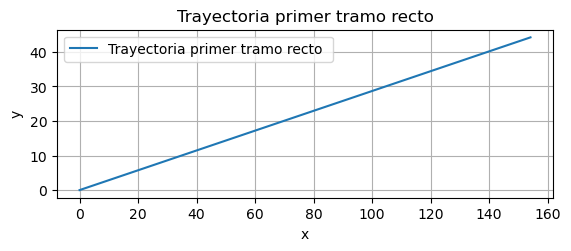

In [ ]:
#punto de inicio
p_ini_der_1er_tramo = np.array([0,0])
p_ini_izq_1er_tramo = punto_final_de_una_recta(p_ini_der_1er_tramo, 17.46, (180-107))
p_ini_izq_1er_tramo = [-1, 1]*p_ini_izq_1er_tramo
p_inicial_primer_tramo = punto_aleatorio_en_un_segmento(p_ini_der_1er_tramo, p_ini_izq_1er_tramo)

#punto final
p_final_izq_1er_tramo = punto_final_de_una_recta(p_ini_izq_1er_tramo, 154.50, 16.7)
p_final_der_1er_tramo = punto_final_de_una_recta(p_ini_der_1er_tramo, 164.16, 16)
p_final_primer_tramo = punto_aleatorio_en_un_segmento(p_final_izq_1er_tramo, p_final_der_1er_tramo)

#dist de corte
dist_limite = math.sqrt(p_final_primer_tramo[0]**2 + p_final_primer_tramo[1]**2)

#angulo de trayectoria
adyacente = abs(p_inicial_primer_tramo[0] - p_final_primer_tramo[0])
opuesto = abs(p_inicial_primer_tramo[1] - p_final_primer_tramo[1])
angulo_rad_1er = math.atan2(opuesto, adyacente)
print(angulo_rad_1er)

#velocidad
modulo_vel_inicial = random.uniform(62.2, 84.7222)

t = 0
h = 0.1
y = 0
x_result_1er_tramo = range_kutta_de_orden_4(f_recta, t, y, modulo_vel_inicial, h, dist_limite)

puntos_1er_tramo = []
distancias_1er_tramo = [tupla[1] for tupla in x_result_1er_tramo]
vel_1er_tramo = [tupla[2] for tupla in x_result_1er_tramo]
t_final_1er_tramo = [tupla[0] for tupla in x_result_1er_tramo][-1]
t_relativo = t_final_1er_tramo
print(distancias_1er_tramo)
for i in range(len(distancias_1er_tramo)):
    hipotenusa = distancias_1er_tramo[i]
    pos_x = hipotenusa * np.math.cos(angulo_rad_1er)
    pos_y = hipotenusa * np.math.sin(angulo_rad_1er)
    print(f"{pos_x} : {pos_y}")
    puntos_1er_tramo.append([pos_x, pos_y])


pos_x_1er_tramo = [subvector[0] for subvector in puntos_1er_tramo]
pos_y_1er_tramo = [subvector[1] for subvector in puntos_1er_tramo]

plt.subplot(2, 1, 1)
plt.plot(pos_x_1er_tramo, pos_y_1er_tramo, label="Trayectoria primer tramo recto ")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Trayectoria primer tramo recto")
plt.legend()
plt.grid()
plt.show()

2.1156736381300894
pos inicial : [154.1105094481178, 44.190477481186946]
barrido total : 2.1156864012161227


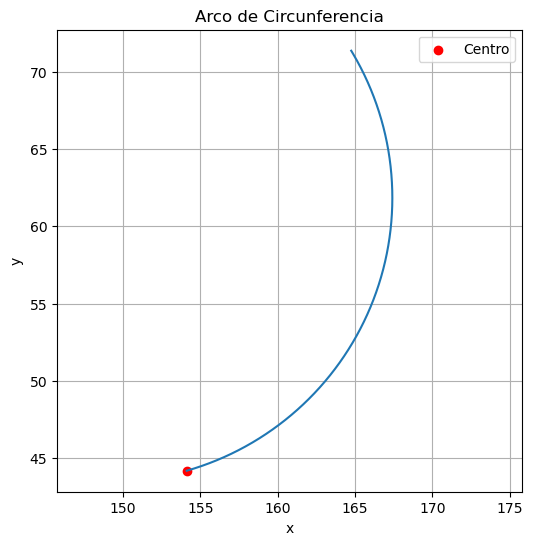

In [5105]:
#Radio y aceleracion en curva
radio = random.uniform(RADIO_INTERNO_PRIMERA_CURVA, RADIO_EXTERNO_PRIMERA_CURVA)
barrida_limite = random.uniform(108, 123.1)
barrida_limite = pasar_a_radianes(barrida_limite)
aceleracion_en_curva = f_recta(t_final_1er_tramo, distancias_1er_tramo[-1], vel_1er_tramo[-1])

#Velocidad angular
vel_x_final_1er_tramo = vel_1er_tramo[-1]*math.cos(angulo_rad_1er)
vel_y_final_1er_tramo = vel_1er_tramo[-1]*math.sin(angulo_rad_1er)
vel_angular_ini_2do_tramo = calcular_velocidad_angular(vel_x_final_1er_tramo, vel_y_final_1er_tramo, radio)

#Trayectoria curva
barrida_inicial = angulo_rad_1er
y_result_2do_tramo = range_kutta_de_orden_4(f_curva, t_final_1er_tramo, angulo_rad_1er, 0.1, 0.01, barrida_limite)

print(barrida_limite)

#obtener datos
angulos_barridos_2d_tramo = [tupla[1] for tupla in y_result_2do_tramo]
vel_ang_2do_tramo = [tupla[2] for tupla in y_result_2do_tramo]
t_final_2do_tramo = [tupla[0] for tupla in y_result_2do_tramo]
t_final_2do_tramo = t_final_2do_tramo[-1]

#Graficar
x0, y0 = puntos_1er_tramo[-1][0], puntos_1er_tramo[-1][1]         # Centro de la circunferencia
print(f"pos inicial : {[x0, y0]}")
r = radio                 # Radio

# Generar los puntos del arco
n_points = 1000  # Número de puntos para suavidad
theta = np.array([angulo - (math.pi/2) for angulo in angulos_barridos_2d_tramo])

print(f"barrido total : {angulos_barridos_2d_tramo[-1]}")

# Coordenadas del arco
puntos_x_2d_tramo = x0 + r * np.cos(theta)
puntos_y_2d_tramo = y0 + r * np.sin(theta)
puntos_2d_tramo_aux = []
relativo_x = abs(puntos_x_2d_tramo[0] - pos_x_1er_tramo[-1])
relativo_y = abs(puntos_y_2d_tramo[0] - pos_y_1er_tramo[-1])
for i in range(len(puntos_y_2d_tramo)):
    x = puntos_x_2d_tramo[i] - relativo_x
    y = puntos_y_2d_tramo[i] + relativo_y
    puntos_2d_tramo_aux.append([x, y])

pos_x_2do_tramo = [subvector[0] for subvector in puntos_2d_tramo_aux]
pos_y_2do_tramo = [subvector[1] for subvector in puntos_2d_tramo_aux]

# Graficar
plt.figure(figsize=(6, 6))
plt.plot(pos_x_2do_tramo, pos_y_2do_tramo)
plt.scatter([x0], [y0], color='red', label='Centro')
plt.axis('equal')
plt.legend()
plt.title('Arco de Circunferencia')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.show()

1696
1696
[0.0, 8.230302236448772, 16.727993898454084, 25.47710696393723, 34.46120096457613, 43.66339387910807, 53.06639385635506, 62.652531708361096, 72.4037941125833, 82.30185746074685, 92.32812229075809, 102.46374823697496, 112.68968943315943, 122.9867303015864, 133.33552166105778, 143.71661708597063, 154.1105094481178]
[154.1105094481178, 154.12815506791438, 154.14579561507176, 154.16343107751086, 154.18106144318955, 154.19868670010231, 154.2163068362803, 154.23392183979107, 154.25153169873843, 154.26913640126233, 154.28673593553864, 154.30433028977905, 154.32191945223087, 154.33950341117688, 154.35708215493514, 154.37465567185893, 154.39222395033642, 154.4097869787907, 154.4273447456794, 154.44489723949468, 154.46244444876302, 154.47998636204505, 154.49752296793537, 154.51505425506232, 154.53258021208802, 154.55010082770787, 154.56761609065066, 154.5851259896783, 154.60263051358552, 154.6201296512, 154.63762339138177, 154.65511172302345, 154.67259463504982, 154.69007211641764, 154

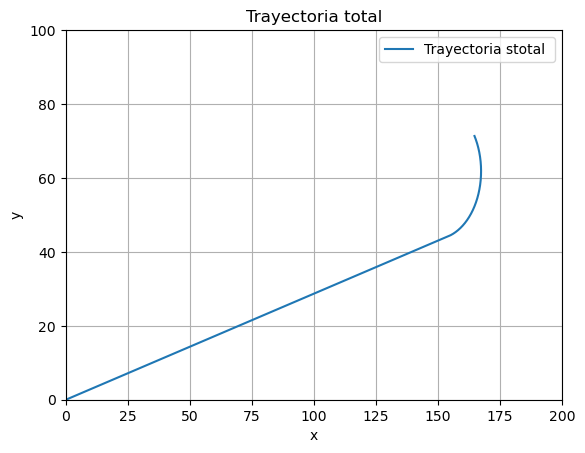

In [5106]:
print(len(pos_x_2do_tramo))
print(len(pos_y_2do_tramo))

print(pos_x_1er_tramo)
print(pos_x_2do_tramo)

x_pos_final = pos_x_1er_tramo + pos_x_2do_tramo
y_pos_final = pos_y_1er_tramo + pos_y_2do_tramo

print(pos_x_1er_tramo[0])
print(x_pos_final[0])

plt.xlim(0, 200)  # Mostrar solo de 0 a 200 en el eje X
plt.ylim(0, 100)  # Mostrar solo de 0 a 100 en el eje Y
# Crear gráfico más grande
#plt.figure(figsize=(12, 8))  # Ancho 12, alto 8 pulgadas
plt.plot(x_pos_final, y_pos_final, label="Trayectoria stotal ")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Trayectoria total")
plt.legend()
plt.grid()
plt.show()

In [5107]:
def calcular_velocidad(omega, r, angulo_rad):
    v = omega * r
    vel_x = v*math.cos(angulo_rad)
    vel_y = v*math.sin(angulo_rad)
    return vel_x, vel_y

121.21990156290559
[0, 0.32596507781631323, 0.9448271670116227, 1.854109177331401, 3.05017156845069, 4.528226917790936, 6.282359082910776, 8.305546881770383, 10.589692196085487, 13.125652385283104, 15.903276881317165, 18.911447817867703, 22.138124531299027, 25.570391755254985, 29.194511315985103, 32.99597712148317, 36.959573224335806, 41.06943472587564, 45.30911127786088, 49.66163292750616, 54.10957804230983, 58.63514304279817, 63.220213664070684, 67.8464374609111, 72.49529726625147, 77.14818530896046]
164.75062147576122 : 71.35472944717044
164.5816659244049 : 71.63348965527352
164.26089479703754 : 72.16273078112322
163.78959202920376 : 72.94033445609101
163.16964408231968 : 73.96318820252996
162.40353239282243 : 75.22719789194258
161.49432343984154 : 76.72730413235604
160.44565647114754 : 78.45750251931186
159.26172893650664 : 80.41086766941227
157.9472796867467 : 82.57958094022533
156.5075700057828 : 84.95496172559582
154.94836255152475 : 87.52750220109732
153.27589828995855 : 90.286

/tmp/ipykernel_6289/2986124392.py:36: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  pos_x = hipotenusa * np.math.cos(angulos_barridos_2d_tramo[-1] ) + pos_x_final_2do_tramo
/tmp/ipykernel_6289/2986124392.py:37: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  pos_y = hipotenusa * np.math.sin(angulos_barridos_2d_tramo[-1] ) + pos_y_final_2do_tramo


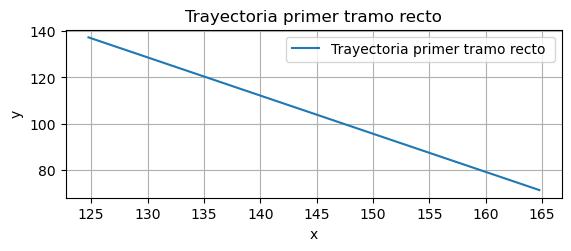

In [5108]:
#punto final 3er tramo
p_final_izq_2do_tramo = punto_final_de_una_curva(p_final_izq_1er_tramo, 19.2, 108, 16.7)
p_final_der_2do_tramo = punto_final_de_una_curva(p_final_der_1er_tramo, 40.80, 123.1, 16)
p_final_izq_3er_tramo = punto_final_de_una_recta(p_final_izq_2do_tramo, 63.54, 108)
p_final_der_3er_tramo = punto_final_de_una_recta(p_final_der_2do_tramo, 63.54, 123.1)
p_final_del_3er_tramo = punto_aleatorio_en_un_segmento(p_final_izq_3er_tramo, p_final_der_3er_tramo)

#punto inicial 3er tramo
pos_x_final_2do_tramo = pos_x_2do_tramo[-1]
pos_y_final_2do_tramo = pos_y_2do_tramo[-1]

#angulo de trayectoria
adyacente = abs(pos_x_final_2do_tramo - p_final_del_3er_tramo[0])
opuesto = abs(pos_y_final_2do_tramo - p_final_del_3er_tramo[1])

#distancia_limite
dist_limite = math.sqrt(adyacente**2 + opuesto**2)

#calculo_de_velocidad
vel_ini_x, vel_ini_y = calcular_velocidad(vel_ang_2do_tramo[-1], radio, angulos_barridos_2d_tramo[-1])
vel_ini_2do_tramo = math.sqrt(vel_ini_x**2 + vel_ini_y**2)

#trayectoria
y_result_3er_tramo = range_kutta_de_orden_4(f_recta, t_final_2do_tramo, 0, vel_ini_2do_tramo, h, dist_limite)

print(f"{angulos_barridos_2d_tramo[-1] * 180/math.pi}")

puntos_3er_tramo = []
distancias_3er_tramo = [tupla[1] for tupla in y_result_3er_tramo]
vel_3er_tramo = [tupla[2] for tupla in y_result_3er_tramo]
t_final_3er_tramo = [tupla[0] for tupla in y_result_3er_tramo][-1]
t_relativo = t_final_3er_tramo
print(distancias_3er_tramo)
for i in range(len(distancias_3er_tramo)):
    hipotenusa = distancias_3er_tramo[i]
    pos_x = hipotenusa * np.math.cos(angulos_barridos_2d_tramo[-1] ) + pos_x_final_2do_tramo
    pos_y = hipotenusa * np.math.sin(angulos_barridos_2d_tramo[-1] ) + pos_y_final_2do_tramo
    print(f"{pos_x} : {pos_y}")
    puntos_3er_tramo.append([pos_x, pos_y])


pos_x_3er_tramo = [subvector[0] for subvector in puntos_3er_tramo]
pos_y_3er_tramo = [subvector[1] for subvector in puntos_3er_tramo]

plt.subplot(2, 1, 1)
plt.plot(pos_x_3er_tramo, pos_y_3er_tramo, label="Trayectoria primer tramo recto ")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Trayectoria primer tramo recto")
plt.legend()
plt.grid()
plt.show()

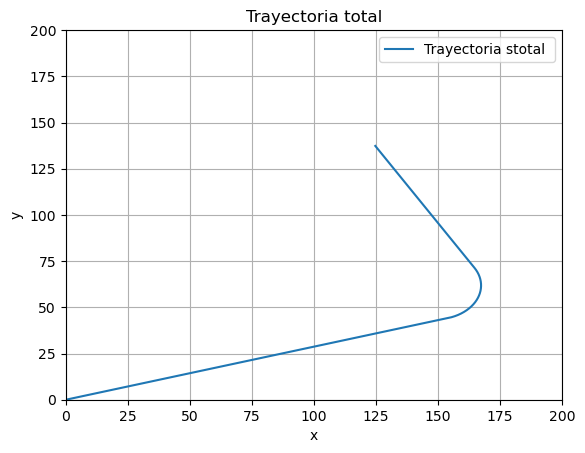

In [5109]:
x_pos_final = pos_x_1er_tramo + pos_x_2do_tramo + pos_x_3er_tramo
y_pos_final = pos_y_1er_tramo + pos_y_2do_tramo + pos_y_3er_tramo

plt.xlim(0, 200)  # Mostrar solo de 0 a 200 en el eje X
plt.ylim(0, 200)  # Mostrar solo de 0 a 100 en el eje Y
# Crear gráfico más grande
plt.plot(x_pos_final, y_pos_final, label="Trayectoria stotal ")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Trayectoria total")
plt.legend()
plt.grid()
plt.show()

In [5110]:
def f_curva_2 (timepo, angulo, velocidad_angular):
    return (aceleracion_en_curva * np.sin(((angulo - barrida_inicial)/barrida_limite)*math.pi*2) / radio*velocidad_angular) * np.sin(angulo)

121.21990156290559
2.746477037442059
pos inicial : [124.76285876100404, 137.33064421562193]
barrido total : 157.4020298256486


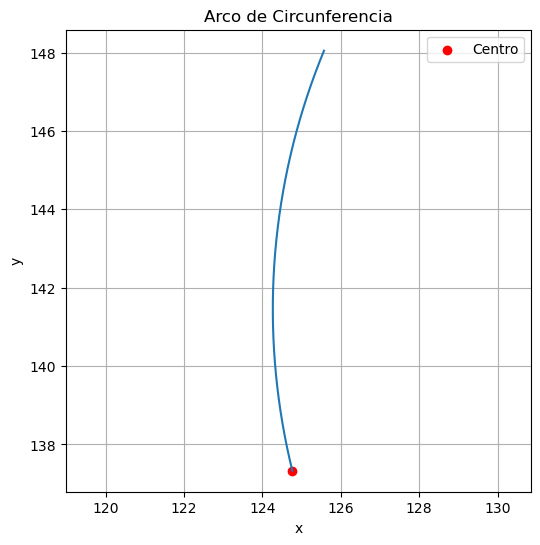

In [5111]:
#Radio y aceleracion en curva
radio = random.uniform(RADIO_INTERNO_SEGUNDA_CURVA, RADIO_EXTERNO_SEGUNDA_CURVA)
barrida_limite = random.uniform(65+90, 76.2+90)
barrida_limite = pasar_a_radianes(barrida_limite)
aceleracion_en_curva = f_recta(t_final_3er_tramo, distancias_3er_tramo[-1], vel_3er_tramo[-1])

#Velocidad angular
vel_x_final_3er_tramo = vel_3er_tramo[-1]*math.cos(angulos_barridos_2d_tramo[-1])
vel_y_final_3er_tramo = vel_3er_tramo[-1]*math.sin(angulos_barridos_2d_tramo[-1])
vel_angular_ini_4to_tramo = calcular_velocidad_angular(vel_x_final_3er_tramo, vel_y_final_3er_tramo, radio)
t_relativo = t_final_1er_tramo + t_final_2do_tramo + t_final_3er_tramo
print(angulos_barridos_2d_tramo[-1]*180/math.pi)

#Trayectoria curva
barrida_inicial = angulos_barridos_2d_tramo[-1]
y_result_4to_tramo = range_kutta_de_orden_4(f_curva_2, 0, angulos_barridos_2d_tramo[-1], 0.1, 0.01, barrida_limite)

print(barrida_limite)

#obtener datos
angulos_barridos_4to_tramo = [tupla[1] for tupla in y_result_4to_tramo]
vel_ang_4to_tramo = [tupla[2] for tupla in y_result_4to_tramo]
t_final_4to_tramo = [tupla[0] for tupla in y_result_4to_tramo]
t_final_4to_tramo = t_final_4to_tramo[-1]

#Graficar
x0, y0 = puntos_3er_tramo[-1][0], puntos_3er_tramo[-1][1]         # Centro de la circunferencia
print(f"pos inicial : {[x0, y0]}")
r = radio                 # Radio

# Generar los puntos del arco
theta = np.array([angulo + math.pi/4 for angulo in angulos_barridos_4to_tramo])

print(f"barrido total : {angulos_barridos_4to_tramo[-1] * 180/math.pi}")

# Coordenadas del arco
puntos_x_4to_tramo = x0 + r * np.cos(theta)
puntos_y_4to_tramo = y0 - r * np.sin(theta)
puntos_4to_tramo_aux = []
relativo_x = abs(puntos_x_4to_tramo[0] - pos_x_3er_tramo[-1])
relativo_y = abs(puntos_y_4to_tramo[0] - pos_y_3er_tramo[-1])
for i in range(len(puntos_y_4to_tramo)):
    x = puntos_x_4to_tramo[i] + relativo_x
    y = puntos_y_4to_tramo[i] + relativo_y
    puntos_4to_tramo_aux.append([x, y])

pos_x_4to_tramo = [subvector[0] for subvector in puntos_4to_tramo_aux]
pos_y_4to_tramo = [subvector[1] for subvector in puntos_4to_tramo_aux]

# Graficar
plt.figure(figsize=(6, 6))
plt.plot(pos_x_4to_tramo, pos_y_4to_tramo)
plt.scatter([x0], [y0], color='red', label='Centro')
plt.axis('equal')
plt.legend()
plt.title('Arco de Circunferencia')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.show()

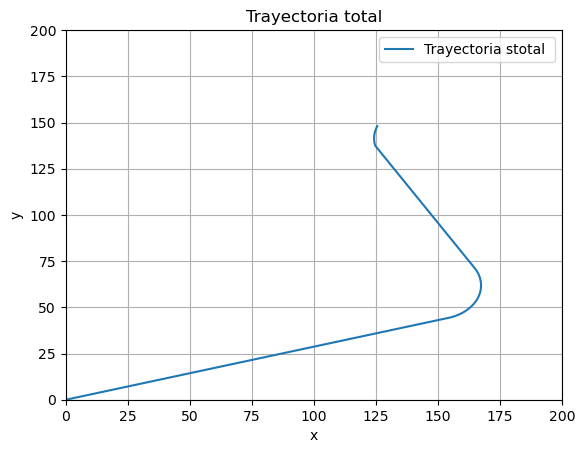

In [5112]:
x_pos_final = pos_x_1er_tramo + pos_x_2do_tramo + pos_x_3er_tramo + pos_x_4to_tramo
y_pos_final = pos_y_1er_tramo + pos_y_2do_tramo + pos_y_3er_tramo + pos_y_4to_tramo

plt.xlim(0, 200)  # Mostrar solo de 0 a 200 en el eje X
plt.ylim(0, 200)  # Mostrar solo de 0 a 100 en el eje Y
# Crear gráfico más grande
plt.plot(x_pos_final, y_pos_final, label="Trayectoria stotal ")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Trayectoria total")
plt.legend()
plt.grid()
plt.show()

[0, 0.2879288572174692, 0.868505885019177, 1.7386621037931522, 2.893797793968793, 4.327806810524622, 6.033108860587652, 8.000689573502248, 10.220148151554708, 12.679752349467819, 15.366500492039114, 18.2661902020924, 21.36349347544078, 24.64203770600859, 28.084492232806646, 31.672659951266166, 35.387573504666186, 39.209595547178424, 43.118522548530734, 47.09369159156897, 51.114089598176285, 55.15846440617258, 59.20543711003212]
125.5706855192616 : 148.04696442099913
125.68132581507734 : 148.3127872036201
125.90441986240754 : 148.84878975142834
126.2387883671189 : 149.6521387093091
126.68266382893766 : 150.71858750653882
127.23369988460588 : 152.04249880451803
127.88898371095628 : 153.61687429622032
128.64505142234162 : 155.43339169983471
129.4979063810269 : 157.48244875105038
130.44304032375362 : 159.753213961436
131.4754571927997 : 162.23368387460152
132.58969954556198 : 164.9107465174808
133.77987740305784 : 167.77025071132647
135.0396993848505 : 170.7970808760337
136.36250596581607 

/tmp/ipykernel_6289/3672153126.py:34: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  pos_x = hipotenusa * np.math.cos(angulos_barridos_4to_tramo[-1] - math.pi/2) + pos_x_final_4to_tramo
/tmp/ipykernel_6289/3672153126.py:35: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  pos_y = hipotenusa * np.math.sin(angulos_barridos_4to_tramo[-1] - math.pi/2) + pos_y_final_4to_tramo


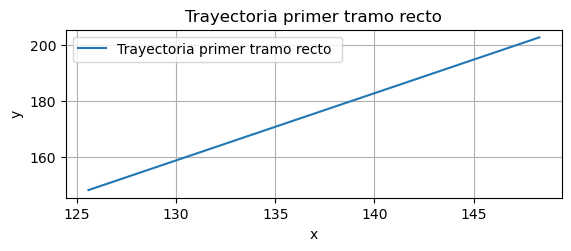

In [5113]:
#punto final 5to tramo
p_final_izq_4to_tramo = punto_final_de_una_curva(p_final_izq_3er_tramo, 49.80, 65, 108)
p_final_der_4to_tramo = punto_final_de_una_curva(p_final_der_3er_tramo, 36.90, 76.2, 123.1)
p_final_izq_5to_tramo = punto_final_de_una_recta(p_final_izq_4to_tramo, 70.64, 65)
p_final_der_5to_tramo = punto_final_de_una_recta(p_final_der_4to_tramo, 70.44, 76.2)
p_final_del_5to_tramo = punto_aleatorio_en_un_segmento(p_final_izq_5to_tramo, p_final_der_5to_tramo)

#punto inicial 5to tramo
pos_x_final_4to_tramo = pos_x_4to_tramo[-1]
pos_y_final_4to_tramo = pos_y_4to_tramo[-1]

#angulo de trayectoria
adyacente = abs(pos_x_final_4to_tramo - p_final_del_5to_tramo[0])
opuesto = abs(pos_y_final_4to_tramo - p_final_del_5to_tramo[1])

#distancia_limite
dist_limite = math.sqrt(adyacente**2 + opuesto**2)

#calculo_de_velocidad
vel_ini_x, vel_ini_y = calcular_velocidad(vel_ang_4to_tramo[-1], radio, angulos_barridos_4to_tramo[-1])
vel_ini_4to_tramo = math.sqrt(vel_ini_x**2 + vel_ini_y**2)

#trayectoria
y_result_5to_tramo = range_kutta_de_orden_4(f_recta, t_final_4to_tramo, 0, vel_ini_4to_tramo, h, dist_limite)

puntos_5to_tramo = []
distancias_5to_tramo = [tupla[1] for tupla in y_result_5to_tramo]
vel_5to_tramo = [tupla[2] for tupla in y_result_5to_tramo]
t_final_5to_tramo = [tupla[0] for tupla in y_result_5to_tramo][-1]
t_relativo = t_final_5to_tramo
print(distancias_5to_tramo)
for i in range(len(distancias_5to_tramo)):
    hipotenusa = distancias_5to_tramo[i]
    pos_x = hipotenusa * np.math.cos(angulos_barridos_4to_tramo[-1] - math.pi/2) + pos_x_final_4to_tramo
    pos_y = hipotenusa * np.math.sin(angulos_barridos_4to_tramo[-1] - math.pi/2) + pos_y_final_4to_tramo
    print(f"{pos_x} : {pos_y}")
    puntos_5to_tramo.append([pos_x, pos_y])


pos_x_5to_tramo = [subvector[0] for subvector in puntos_5to_tramo]
pos_y_5to_tramo = [subvector[1] for subvector in puntos_5to_tramo]

plt.subplot(2, 1, 1)
plt.plot(pos_x_5to_tramo, pos_y_5to_tramo, label="Trayectoria primer tramo recto ")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Trayectoria primer tramo recto")
plt.legend()
plt.grid()
plt.show()

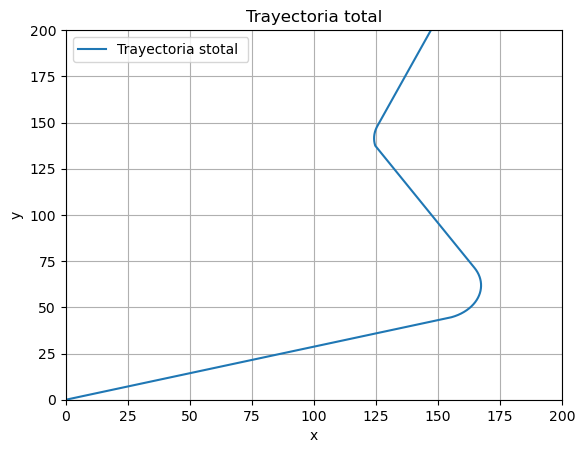

In [5114]:
x_pos_final = pos_x_1er_tramo + pos_x_2do_tramo + pos_x_3er_tramo + pos_x_4to_tramo + pos_x_5to_tramo
y_pos_final = pos_y_1er_tramo + pos_y_2do_tramo + pos_y_3er_tramo + pos_y_4to_tramo + pos_y_5to_tramo

plt.xlim(0, 200)  # Mostrar solo de 0 a 200 en el eje X
plt.ylim(0, 200)  # Mostrar solo de 0 a 100 en el eje Y
# Crear gráfico más grande
plt.plot(x_pos_final, y_pos_final, label="Trayectoria stotal ")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Trayectoria total")
plt.legend()
plt.grid()
plt.show()

In [5115]:
print(t_final_5to_tramo + t_final_1er_tramo + t_final_2do_tramo + t_final_3er_tramo + t_final_4to_tramo)

57.120000000000026
